In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

# Loading the CSV file
file_path = '/content/drive/MyDrive/node_features_df.csv'
data = pd.read_csv(file_path)

print(data.head())

   Cluster ID  Num Amenities  Centroid Latitude  Centroid Longitude  bar  \
0         100             42          28.632487           77.222349    3   
1           8             19          28.641394           77.214142    1   
2          78             45          28.630393           77.220685    9   
3          56             21          28.640264           77.210198    1   
4         131             16          28.640693           77.212548    1   

   cafe  fast_food  food_court  ice_cream  pub  ...  shelter  telephone  \
0     3          6           0          0    0  ...        0          0   
1     1          1           0          0    0  ...        0          0   
2     6          9           1          1    0  ...        0          0   
3     2          2           0          0    1  ...        0          0   
4     3          1           0          0    0  ...        0          0   

   toilets  crematorium  grave_yard  internet_cafe  marketplace  \
0        0            0  

In [12]:
# Extracting latitude and longitude as pairs
cluster_centers = list(zip(data.iloc[:, 3], data.iloc[:, 2]))

# Display the cluster centers
print("Cluster Centers (longitude,latitude):")
print(cluster_centers)

Cluster Centers (longitude,latitude):
[(77.22234933571428, 28.63248719523809), (77.21414228421052, 28.6413942), (77.22068524888888, 28.63039345111111), (77.2101978904762, 28.640264495238096), (77.212547725, 28.640693075), (77.2214069054054, 28.6346417), (77.22693740789474, 28.60064228421053), (77.22517948888888, 28.58416395555556), (77.23848695555556, 28.577054155555555), (77.21675767666667, 28.632403966666665), (77.21961543181818, 28.627950113636363), (77.16840996901408, 28.587972212676057), (77.21793683846154, 28.63433527179487), (77.18872127142858, 28.647147392857143), (77.18557196, 28.64078308), (77.22032065714286, 28.568987742857143), (77.23263906666666, 28.6631968), (77.1870849, 28.602268972222223), (77.2200414, 28.5818566), (77.21445008, 28.64679094), (77.22848394, 28.64906178), (77.2426321, 28.6131498), (77.23299366250001, 28.6494965375), (77.22956115454545, 28.57420759090909), (77.2393968375, 28.6458406875), (77.2246993, 28.629685480952386), (77.21945255416666, 28.633525564583

In [13]:
cluster_ids = data.iloc[:, 0].tolist()

print(cluster_ids)

[100, 8, 78, 56, 131, 22, 6, 15, 80, 45, 0, 19, 33, 14, 63, 135, 145, 27, 107, 44, 26, 104, 52, 108, 77, 41, 60, 75, 72, 42, 36, 7, 23, 97, 133, 73, 129, 4, 24, 89, 84, 18, 106, 48, 31, 46, 5, 21, 91, 25, 29, 120, 55, 43, 35, 109, 118, 2, 127, 69, 124, 148, 105, 139, 134, 79, 110, 101, 11, 12, 65, 86, 28, 9, 117, 16, 90, 111, 59, 136, 121, 95, 122, 10, 141, 70, 116, 66, 68, 102, 138, 88, 64, 47, 126, 67, 98, 132, 34, 113, 38, 130, 53, 76, 50, 83, 58, 39, 51, 93, 92, 140, 99, 37, 3, 20, 87, 85, 54, 32, 40, 96, 144, 71, 137, 17, 149, 13, 61, 62, 112, 81, 119, 74, 49, 1, 114, 123, 128, 146, 143, 30, 147, 115, 142, 103, 82, 94, 57, 125]


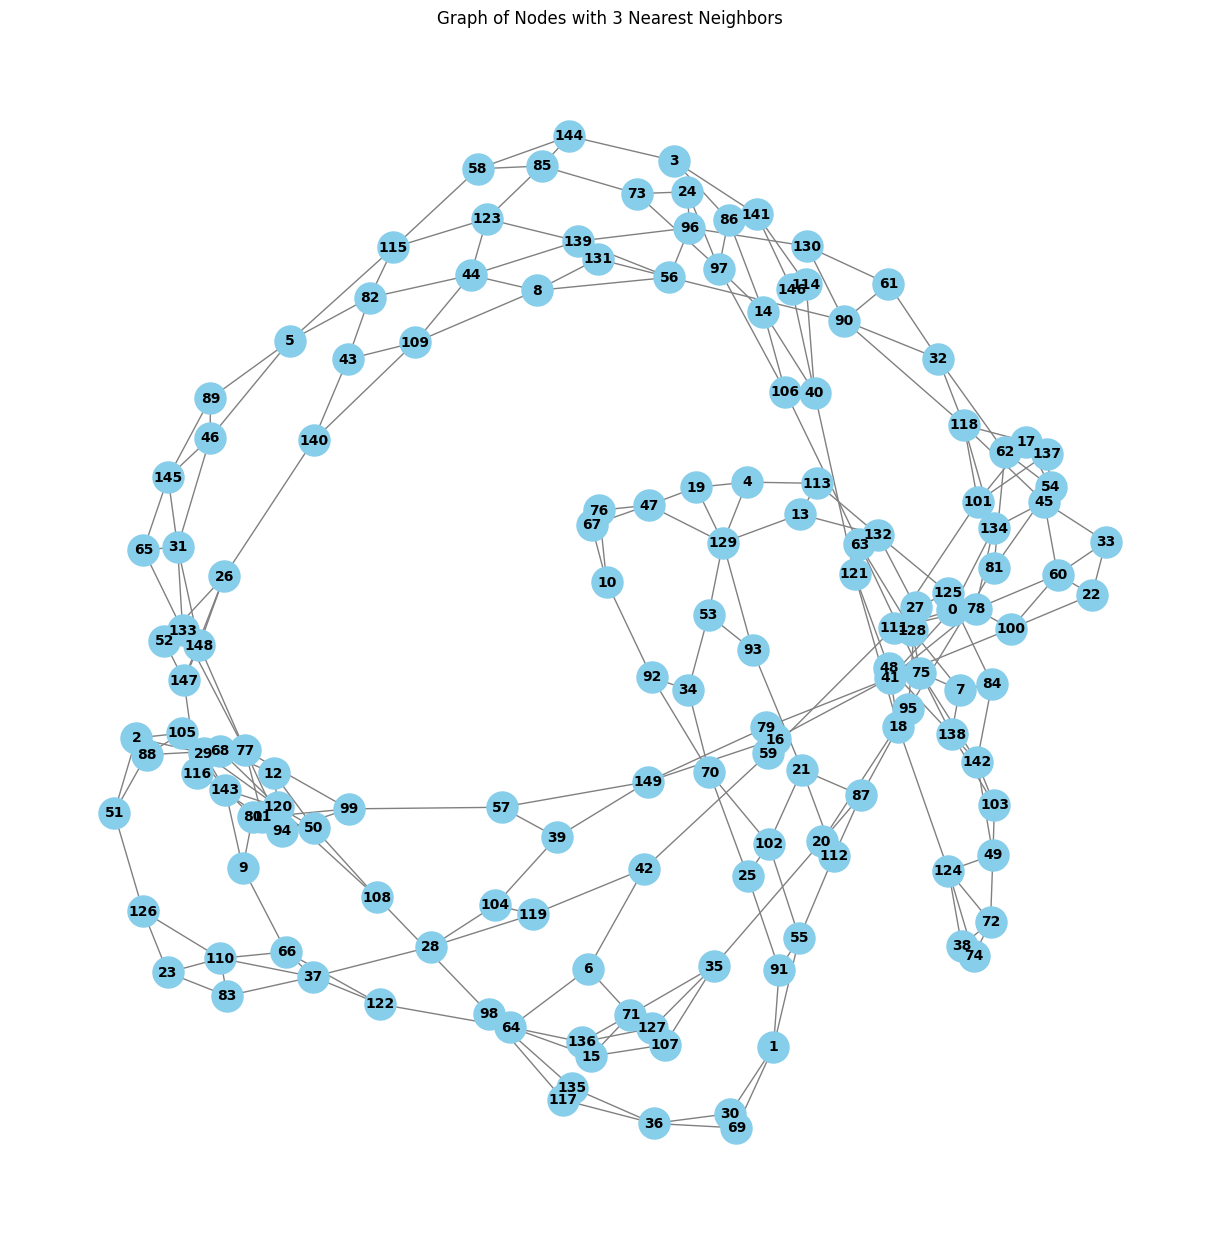

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

distances = cdist(cluster_centers, cluster_centers, metric='euclidean')

# Creating a graph
G = nx.Graph()

# Adding nodes to the graph
for cluster_id in cluster_ids:
    G.add_node(cluster_id)

# Connecting each node to its 3 nearest neighbors
for i, cluster_id in enumerate(cluster_ids):
    nearest_neighbors = np.argsort(distances[i])[:4]
    nearest_neighbors = nearest_neighbors[nearest_neighbors != i]

    for neighbor_idx in nearest_neighbors:
        neighbor_id = cluster_ids[neighbor_idx]
        # Adding an edge between the node and its nearest neighbor
        G.add_edge(cluster_id, neighbor_id)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning the nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color='gray')
plt.title("Graph of Nodes with 3 Nearest Neighbors")
plt.show()

In [20]:
# Extracting the cluster IDs and coordinates (latitude and longitude)
cluster_ids = data.iloc[:, 0].tolist()
coordinates = data.iloc[:, 2:4].values  # Extract latitude and longitude columns

# Calculating the pairwise distances between all nodes based on latitude and longitude
distances = cdist(coordinates, coordinates, metric='euclidean')

edge_data = []

for node1_idx, node1_id in enumerate(cluster_ids):
    nearest_neighbors = np.argsort(distances[node1_idx])[:4]
    nearest_neighbors = nearest_neighbors[nearest_neighbors != node1_idx]

    for node2_idx in nearest_neighbors:
        node2_id = cluster_ids[node2_idx]

        # Calculating the distance vector components (Δx and Δy)
        delta_x = coordinates[node2_idx, 0] - coordinates[node1_idx, 0]
        delta_y = coordinates[node2_idx, 1] - coordinates[node1_idx, 1]

        # Calculating the Euclidean distance (which is already available in 'distances')
        distance = distances[node1_idx, node2_idx]

        # Storing the information for the edge
        edge_data.append([node1_id, node2_id, delta_x, delta_y, distance])

# Creating a DataFrame from the edge data
columns = ['Starting Node ID', 'Ending Node ID', 'Distance Vector X', 'Distance Vector Y', 'Distance']
edge_df = pd.DataFrame(edge_data, columns=columns)

# Saving the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/graph_edges.csv'
edge_df.to_csv(output_file_path, index=False)

print(edge_df.head())

   Starting Node ID  Ending Node ID  Distance Vector X  Distance Vector Y  \
0               100              22           0.002155          -0.000942   
1               100              78          -0.002094          -0.001664   
2               100              60           0.001038          -0.002897   
3                 8             131          -0.000701          -0.001595   
4                 8              56          -0.001130          -0.003944   

   Distance  
0  0.002352  
1  0.002674  
2  0.003077  
3  0.001742  
4  0.004103  
